# Lesson 4: <font color = 'green'>Sentinel 2 indices using Python</font>

In this notebook you will learn how to use Sentinel data to calculate various indices on satellite images.

# Import Modules

In [1]:
from glob import glob

import numpy as np
np.seterr(divide='ignore', invalid='ignore')

import rasterio 
from rasterio.plot import plotting_extent
from rasterio.plot import show

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
import os
import cv2

## Sentinel 2 images

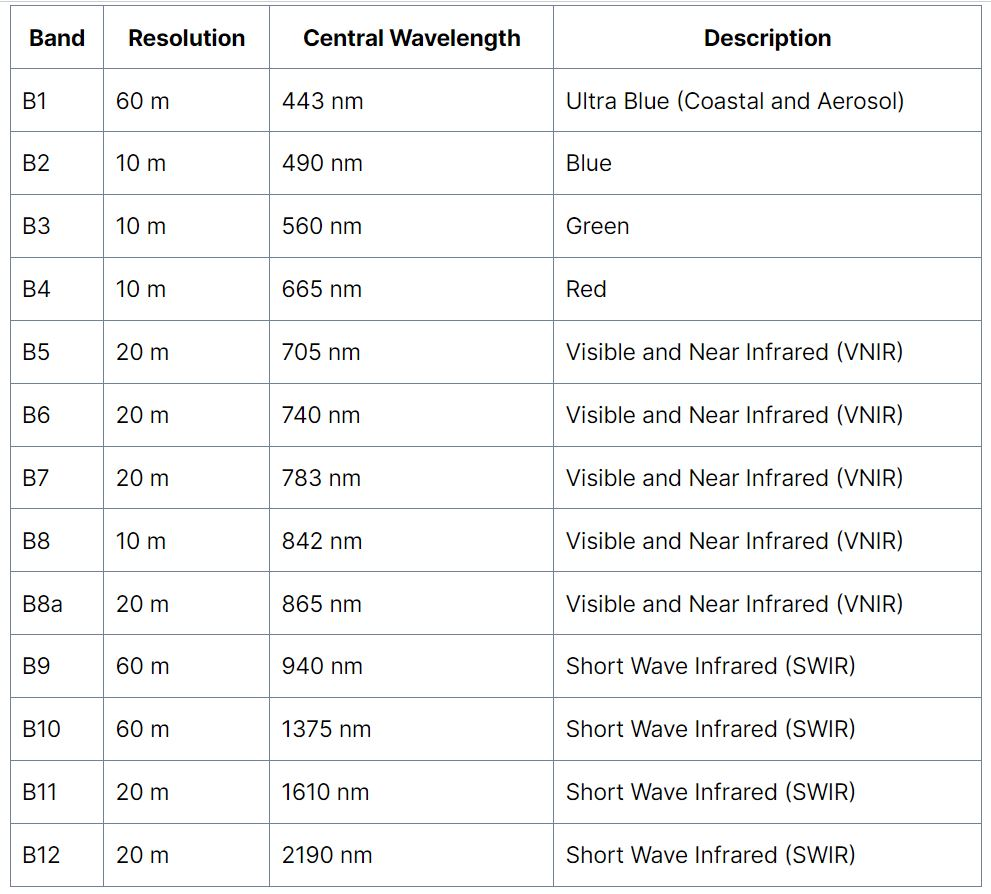

In [2]:
# let's read all the bands
cwd = os.getcwd()
bands = glob(os.path.join(cwd,"data/bands/T33*"))
bands.sort()

In [3]:
bands

['C:\\Users\\degas\\Documents\\Github\\YouTube\\GeoSpatial\\data/bands\\T33SVC_20230830T094549_B01_60m.jp2',
 'C:\\Users\\degas\\Documents\\Github\\YouTube\\GeoSpatial\\data/bands\\T33SVC_20230830T094549_B02_60m.jp2',
 'C:\\Users\\degas\\Documents\\Github\\YouTube\\GeoSpatial\\data/bands\\T33SVC_20230830T094549_B03_60m.jp2',
 'C:\\Users\\degas\\Documents\\Github\\YouTube\\GeoSpatial\\data/bands\\T33SVC_20230830T094549_B04_60m.jp2',
 'C:\\Users\\degas\\Documents\\Github\\YouTube\\GeoSpatial\\data/bands\\T33SVC_20230830T094549_B05_60m.jp2',
 'C:\\Users\\degas\\Documents\\Github\\YouTube\\GeoSpatial\\data/bands\\T33SVC_20230830T094549_B06_60m.jp2',
 'C:\\Users\\degas\\Documents\\Github\\YouTube\\GeoSpatial\\data/bands\\T33SVC_20230830T094549_B07_60m.jp2',
 'C:\\Users\\degas\\Documents\\Github\\YouTube\\GeoSpatial\\data/bands\\T33SVC_20230830T094549_B09_60m.jp2',
 'C:\\Users\\degas\\Documents\\Github\\YouTube\\GeoSpatial\\data/bands\\T33SVC_20230830T094549_B11_60m.jp2',
 'C:\\Users\\degas\

In [4]:
# read all available images with rasterio library
images = []
for i in bands:
    with rasterio.open(i, 'r') as f:
        band = f.read(1)
        images.append(band)

In [5]:
# stack images as n dimensional array. The band order will be the same as in the cell 3
arrImages = np.stack(images)

In [6]:
# check size
arrImages.shape

(12, 1830, 1830)

In [7]:
arrImages.dtype

dtype('uint16')

In [8]:
arrImages.max()

18858

In [9]:
arrImages.min()

0

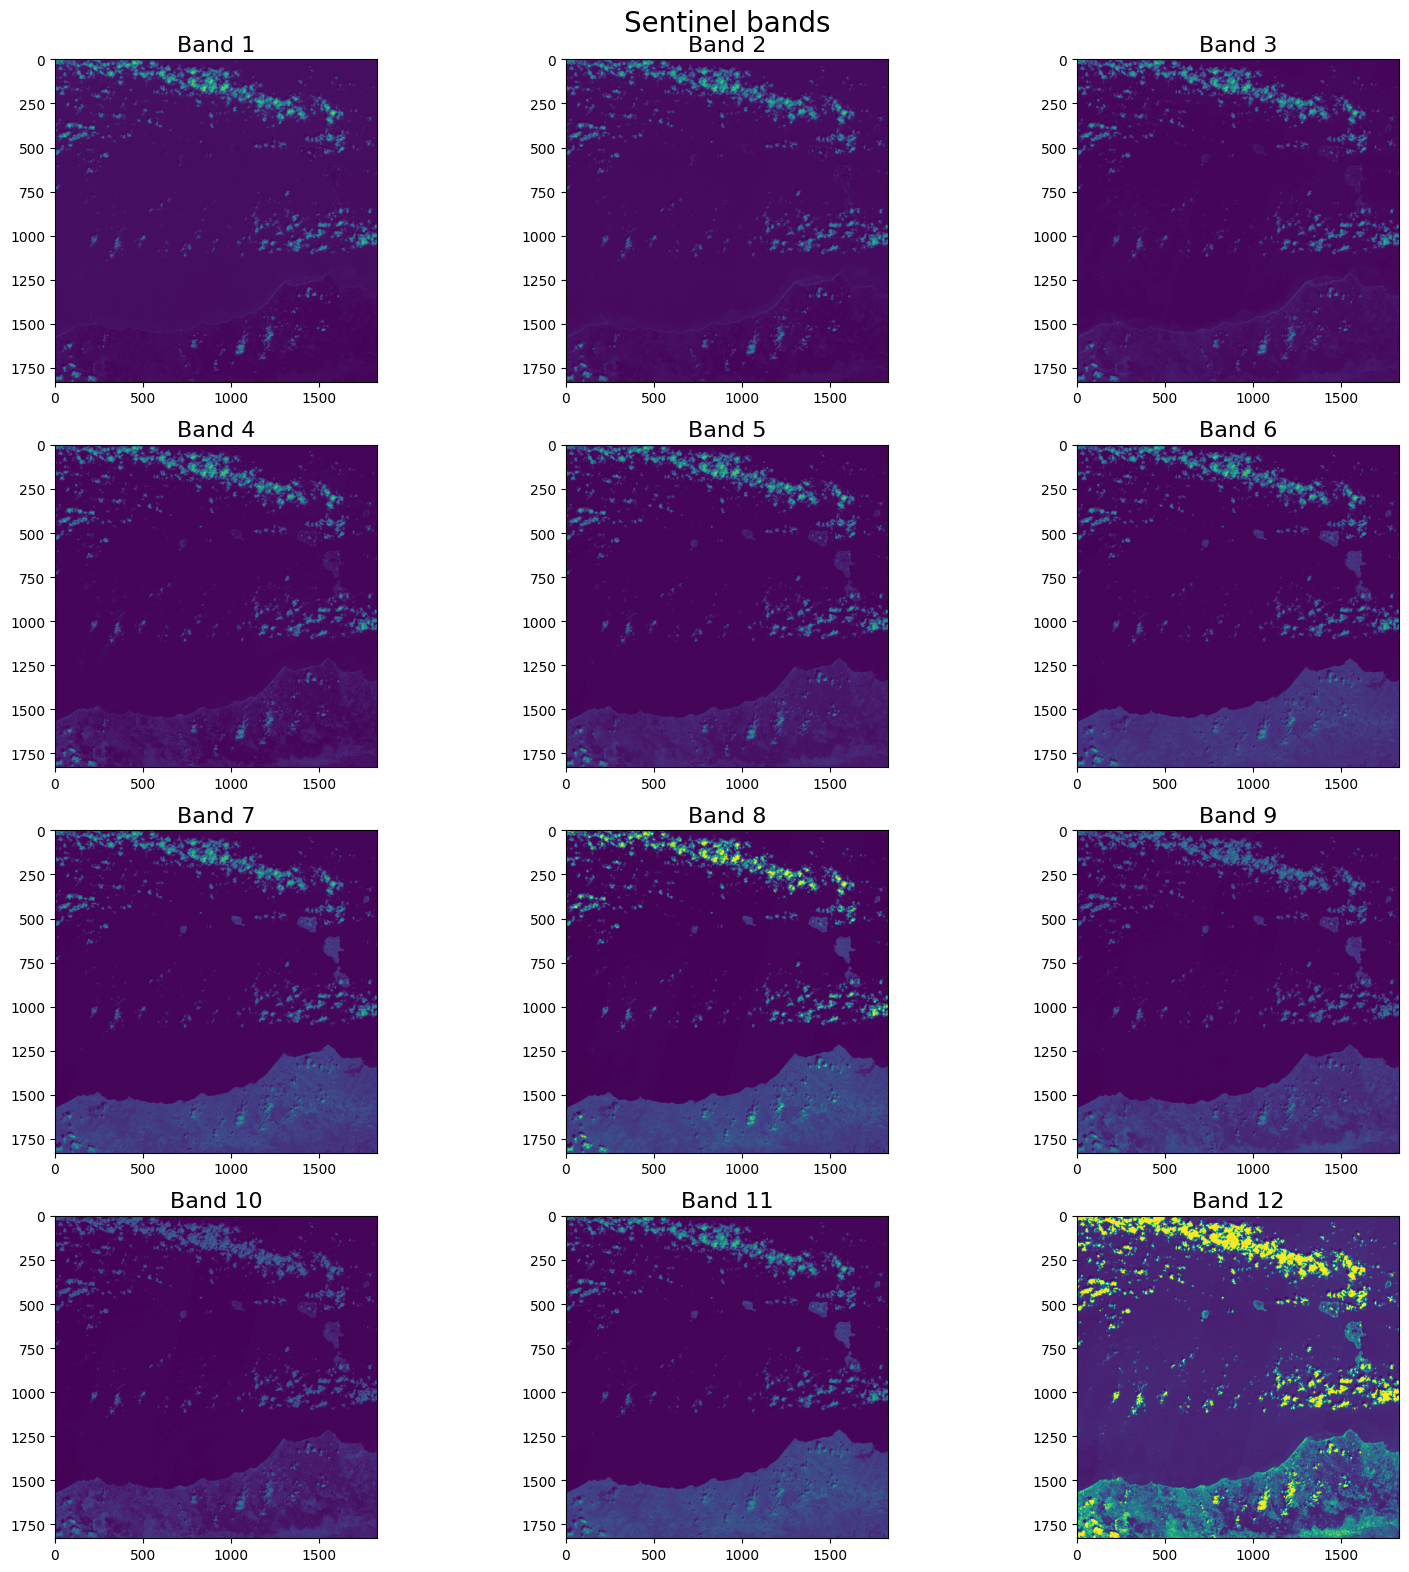

In [10]:
# Create a figure with subplots for each projection
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
fig.suptitle('Sentinel bands', fontsize=20)

# Loop through the projections and add them to the subplots
for i in range(0, len(arrImages)):
    ax = axes[i // 3, i % 3]
    ax.imshow(arrImages[i])
    ax.set_title(f"Band {i+1}", fontsize=16)  # Set subplot title

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

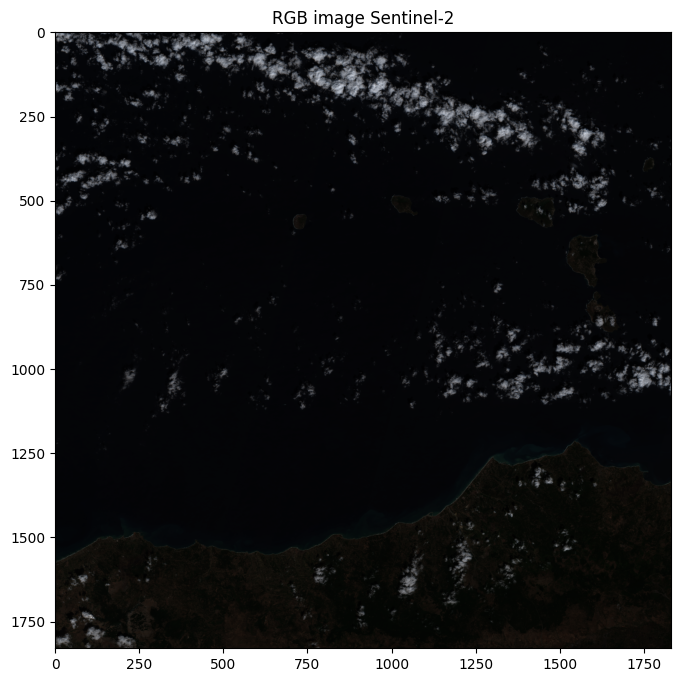

In [11]:
# Step 3: Display the image using Matplotlib
bgr_image = arrImages[1:4].transpose(1, 2, 0)
r_band = bgr_image[:,:,2]
g_band = bgr_image[:,:,1]
b_band = bgr_image[:,:,0]
rgb_image = np.stack((r_band, g_band, b_band), axis=-1)

# Normalize the RGB values to the [0, 1] range
min_val = rgb_image.min()  # Minimum value in your data
max_val = rgb_image.max()  # Maximum value in your data

normalized_image = (rgb_image - min_val) / (max_val - min_val)

# Create a normalized colormap for mapping values to colors
norm = mcolors.Normalize(vmin=0, vmax=1)

# Create a figure and plot the normalized RGB image
plt.figure(figsize=(8, 8))  # Set the figure size as needed
plt.imshow(normalized_image, norm=norm)

plt.axis('on')  # Show axis
plt.title("RGB image Sentinel-2")
plt.show()

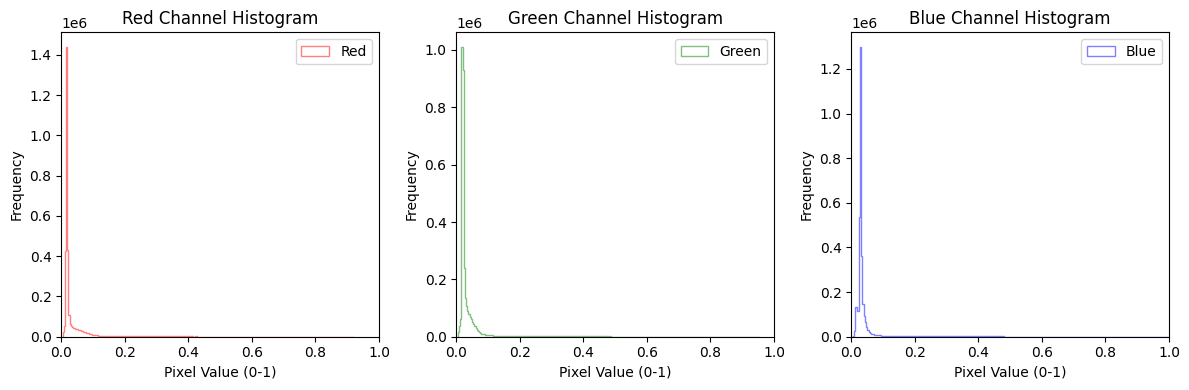

In [12]:
# Create a figure with subplots for each channel's histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot the histograms for each channel
ax1.hist(normalized_image[:,:,0].ravel(), bins=256, color='red', alpha=0.5, label='Red', histtype='step')
ax2.hist(normalized_image[:,:,1].ravel(), bins=256, color='green', alpha=0.5, label='Green', histtype='step')
ax3.hist(normalized_image[:,:,2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', histtype='step')

# Set titles and labels
ax1.set_title('Red Channel Histogram')
ax2.set_title('Green Channel Histogram')
ax3.set_title('Blue Channel Histogram')

for ax in (ax1, ax2, ax3):
    ax.set_xlim(0, 1)
    ax.set_xlabel('Pixel Value (0-1)')
    ax.set_ylabel('Frequency')

# Add legends
ax1.legend()
ax2.legend()
ax3.legend()

# Display the plot
plt.tight_layout()
plt.show()


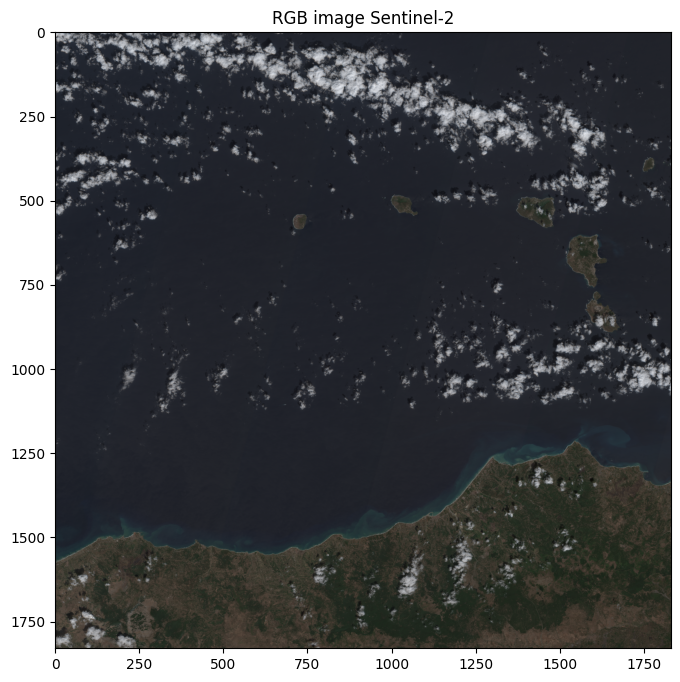

In [13]:
# The composed RGB images can be dark if the pixel brightness is skewed toward 0.
# The brightness, however, can be enhanced by applying gamma correction

# Define the gamma correction factor (adjust as needed)
gamma = 0.5  # You can experiment with different values

# Apply gamma correction
corrected_image = np.power(normalized_image, gamma)

# Ensure the corrected values remain in the [0, 1] range
corrected_image = np.clip(corrected_image, 0.0, 1.0)

# Create a figure and plot the normalized RGB image
plt.figure(figsize=(8, 8))  # Set the figure size as needed
plt.imshow(corrected_image, norm=norm)

plt.axis('on')  # Show axis
plt.title("RGB image Sentinel-2")
plt.show()

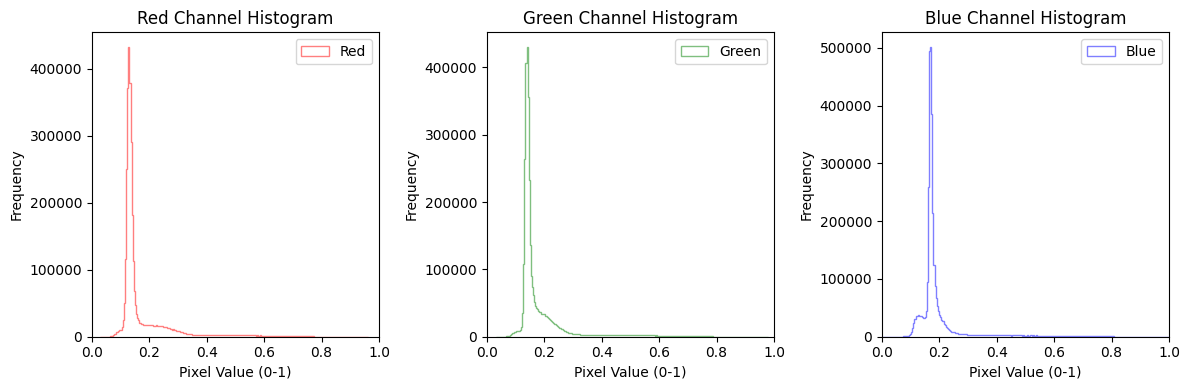

In [14]:
# Create a figure with subplots for each channel's histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot the histograms for each channel
ax1.hist(corrected_image[:,:,0].ravel(), bins=256, color='red', alpha=0.5, label='Red', histtype='step')
ax2.hist(corrected_image[:,:,1].ravel(), bins=256, color='green', alpha=0.5, label='Green', histtype='step')
ax3.hist(corrected_image[:,:,2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', histtype='step')

# Set titles and labels
ax1.set_title('Red Channel Histogram')
ax2.set_title('Green Channel Histogram')
ax3.set_title('Blue Channel Histogram')

for ax in (ax1, ax2, ax3):
    ax.set_xlim(0, 1)
    ax.set_xlabel('Pixel Value (0-1)')
    ax.set_ylabel('Frequency')

# Add legends
ax1.legend()
ax2.legend()
ax3.legend()

# Display the plot
plt.tight_layout()
plt.show()


# Vegetation indices

## Normalized Difference Vegetation Index (NDVI)
```
NDVI = ((NIR - Red)/(NIR + Red))
```

* NIR = pixel values from the near-infrared band
* Red = pixel values from the red band

Negative values of NDVI (values approaching -1) correspond to water. Values close to zero (-0.1 to 0.1) generally correspond to barren areas of rock, sand, or snow. Lastly, low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1).

Text(0.5, 1.0, 'NDVI')

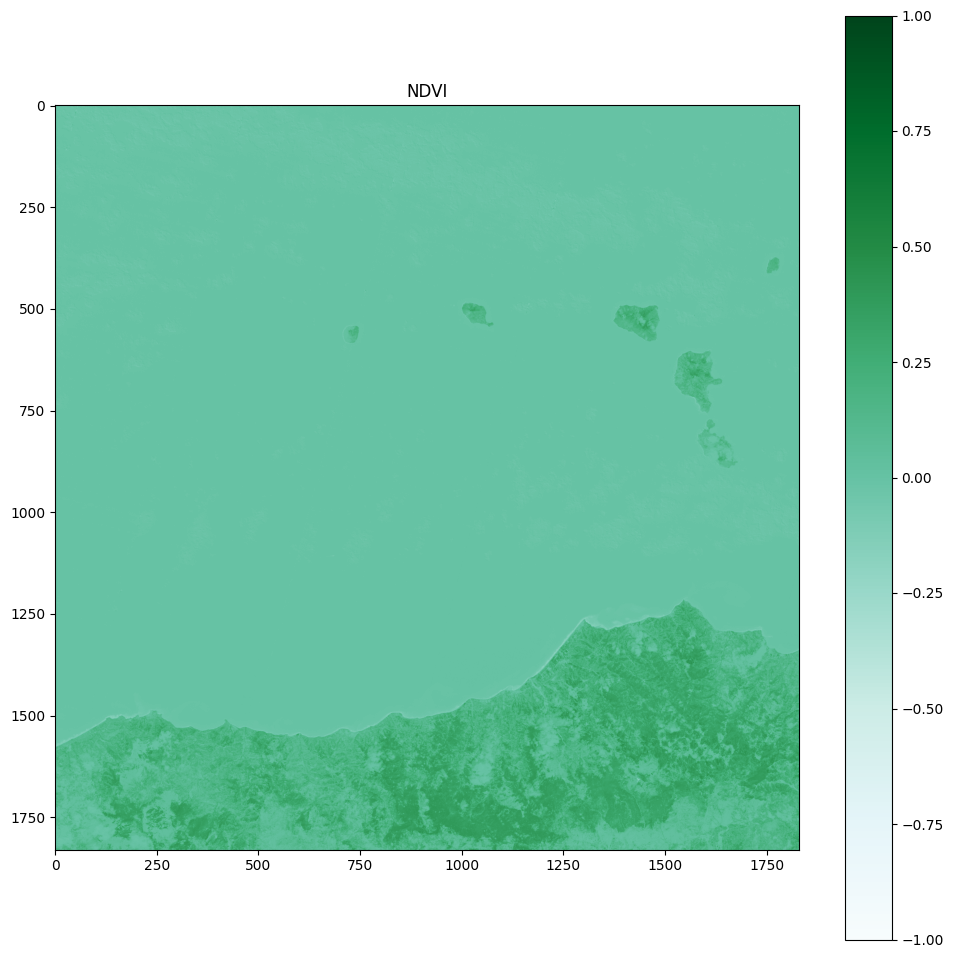

In [15]:
# Note. It is important to convert to float type before calculating indices otherwise we will have wrong calculations with uint type
arrImages = arrImages.astype(float)
ndvi = (arrImages[5]-arrImages[4])/(arrImages[5]+arrImages[4])

# Create a Normalize instance to specify the range for the colorbar
norm = mcolors.Normalize(vmin=-1, vmax=1)

# Create a figure and plot the normalized RGB image
plt.figure(figsize=(12, 12))  # Set the figure size as needed
plt.imshow(ndvi, cmap='BuGn', norm=norm)

plt.colorbar()
plt.axis('on')  # Show axis
plt.title("NDVI")

## Soil-Adjusted Vegetation Index (SAVI) 

```
SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)
```
* NIR = pixel values from the near infrared band
* Red = pixel values from the near red band
* L = amount of green vegetation cover

SAVI is used to correct Normalized Difference Vegetation Index (NDVI) for the influence of soil brightness in areas where vegetative cover is low. The L value varies depending on the amount of green vegetative cover. Generally, it has the following values:
- L=1 in areas with no green vegetation cover
- L=0.5 in areas of moderate green vegetative cover
- L= 0 in areas with very high vegetation cover

Text(0.5, 1.0, 'SAVI')

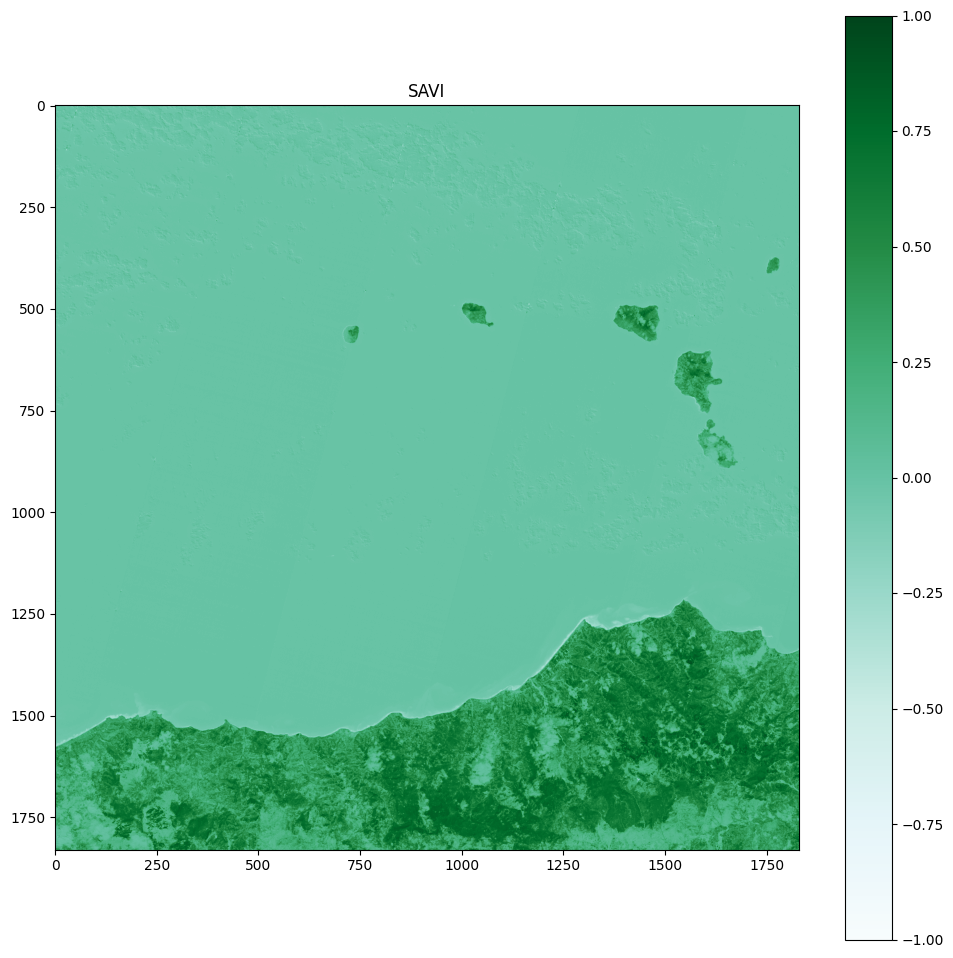

In [16]:
L = 0.5
savi = ((arrImages[5] - arrImages[3]) / (arrImages[5] + arrImages[3] + L)) * (1 + L)

# Create a Normalize instance to specify the range for the colorbar
norm = mcolors.Normalize(vmin=-1, vmax=1)

# Create a figure and plot the normalized RGB image
plt.figure(figsize=(12, 12))  # Set the figure size as needed
plt.imshow(savi, cmap='BuGn', norm=norm)

plt.colorbar()
plt.axis('on')  # Show axis
plt.title("SAVI")

## Visible Atmospherically Resistant Index (VARI)
```
VARI = (Green - Red)/ (Green + Red - Blue)
```
* Green = pixel values from the green band
* Red = pixel values from the red band
* Blue = pixel values from the blue band

The Visible Atmospherically Resistant Index (VARI) is designed to emphasize vegetation in the visible portion of the spectrum, while mitigating illumination differences and atmospheric effects. It is ideal for RGB or color images; it utilizes all three color bands.

Text(0.5, 1.0, 'VARI')

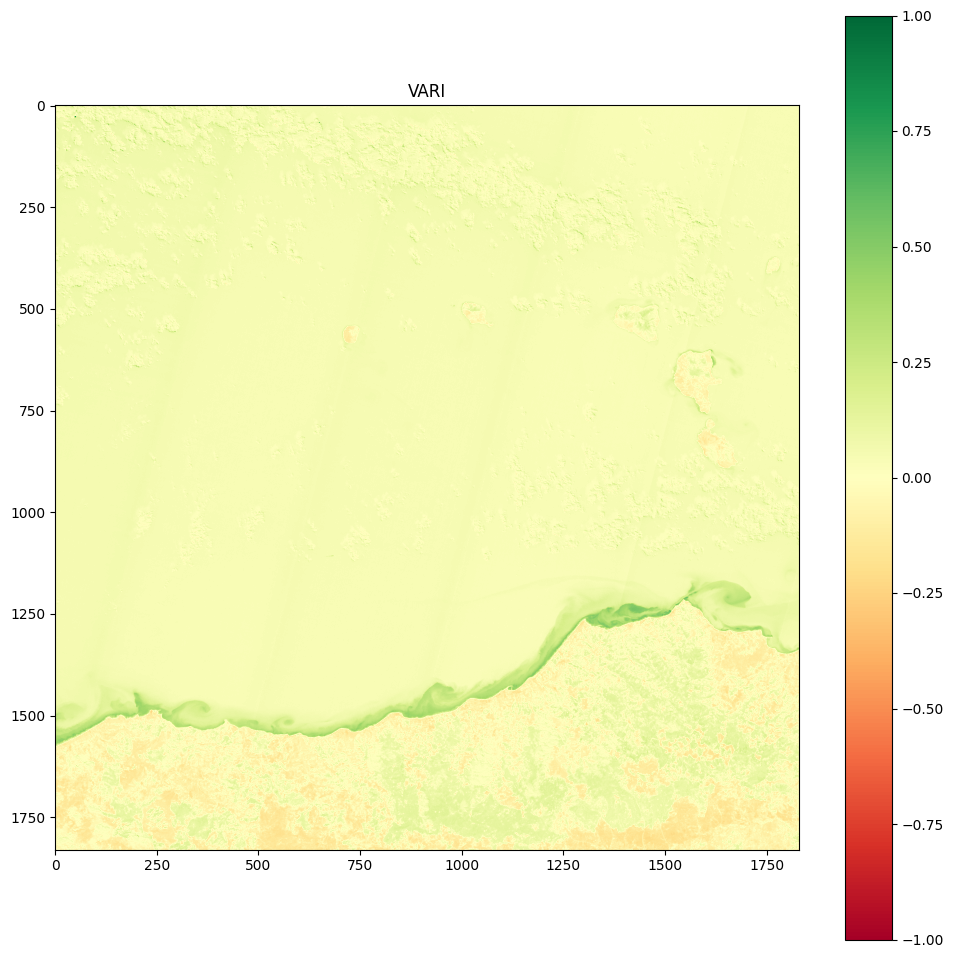

In [17]:
vari = (arrImages[2] - arrImages[3])/ (arrImages[2] + arrImages[3] - arrImages[1])

# Create a Normalize instance to specify the range for the colorbar
norm = mcolors.Normalize(vmin=-1, vmax=1)

# Create a figure and plot the normalized RGB image
plt.figure(figsize=(12, 12))  # Set the figure size as needed
plt.imshow(vari, cmap='RdYlGn', norm=norm)

plt.colorbar()
plt.axis('on')  # Show axis
plt.title("VARI")

## Distribution of NDVI, SAVI, and VARI pixel values

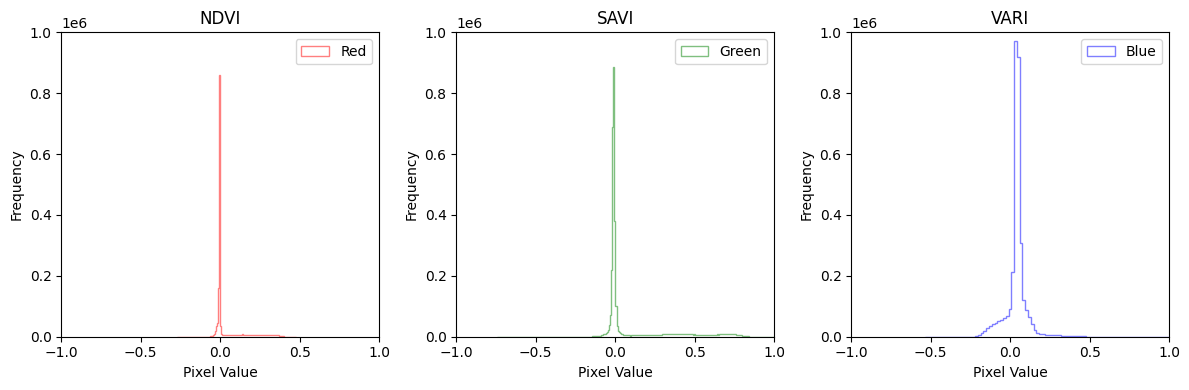

In [18]:
# Create a figure with subplots for each index
indices = np.stack([ndvi, savi, vari])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot the histograms for each channel
ax1.hist(indices[0,:,:].ravel(), bins=256, color='red', alpha=0.5, label='Red', histtype='step')
ax2.hist(indices[1,:,:].ravel(), bins=256, color='green', alpha=0.5, label='Green', histtype='step')
ax3.hist(indices[2,:,:].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', histtype='step')

# Set titles and labels
ax1.set_title('NDVI')
ax2.set_title('SAVI')
ax3.set_title('VARI')

for ax in (ax1, ax2, ax3):
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 1e6)
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Frequency')

# Add legends
ax1.legend()
ax2.legend()
ax3.legend()

# Display the plot
plt.tight_layout()
plt.show()


# Water Indices

## Normalized Difference Water Index (NDWI) 

It is used to monitor changes related to water content in water bodies.

```
MNDWI = (Green - SWIR) / (Green + SWIR)
```
* Green = pixel values from the green band
* SWIR = pixel values from the short-wave infrared band

The NDWI is used to monitor changes related to water content in water bodies. As water bodies strongly absorb light in visible to infrared electromagnetic spectrum, NDWI uses green and near infrared bands to highlight water bodies. It is sensitive to built-up land and can result in over-estimation of water bodies. 
Values description: Index values greater than 0.5 usually correspond to water bodies. Vegetation usually corresponds to much smaller values and built-up areas to values between zero and 0.2.
Source: https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/ndwi/

Text(0.5, 1.0, 'NDWI')

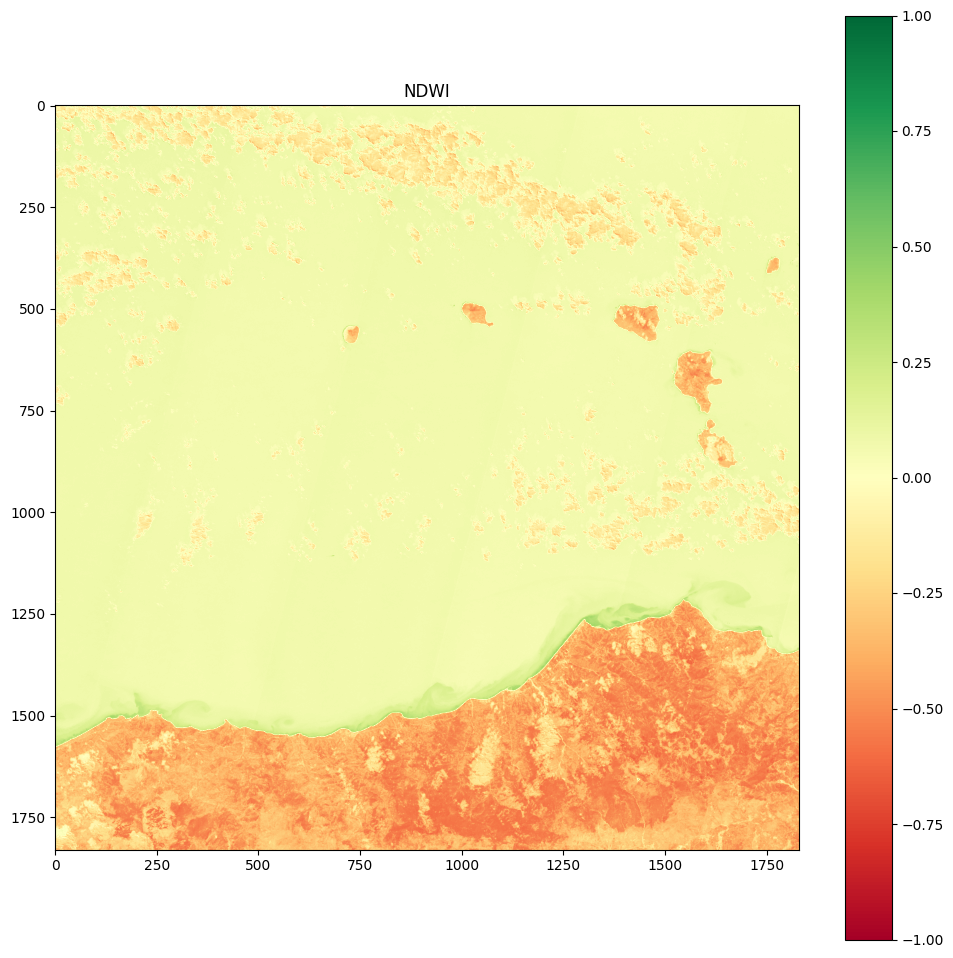

In [19]:
ndwi = (arrImages[2] - arrImages[7])/ (arrImages[2] + arrImages[7])

# Create a Normalize instance to specify the range for the colorbar
norm = mcolors.Normalize(vmin=-1, vmax=1)

# Create a figure and plot the normalized RGB image
plt.figure(figsize=(12, 12))  # Set the figure size as needed
plt.imshow(ndwi, cmap='RdYlGn', norm=norm)

plt.colorbar()
plt.axis('on')  # Show axis
plt.title("NDWI")

Note. For this image the results are quite different from typical values expected for this index according to the terrain type.

## Normalized Difference Moisture Index (NDMI) 

```
NDMI = (NIR - SWIR1)/(NIR + SWIR1)
```
* NIR = pixel values from the near infrared band
* SWIR1 = pixel values from the short-wave infrared 1 band

Text(0.5, 1.0, 'NDMI')

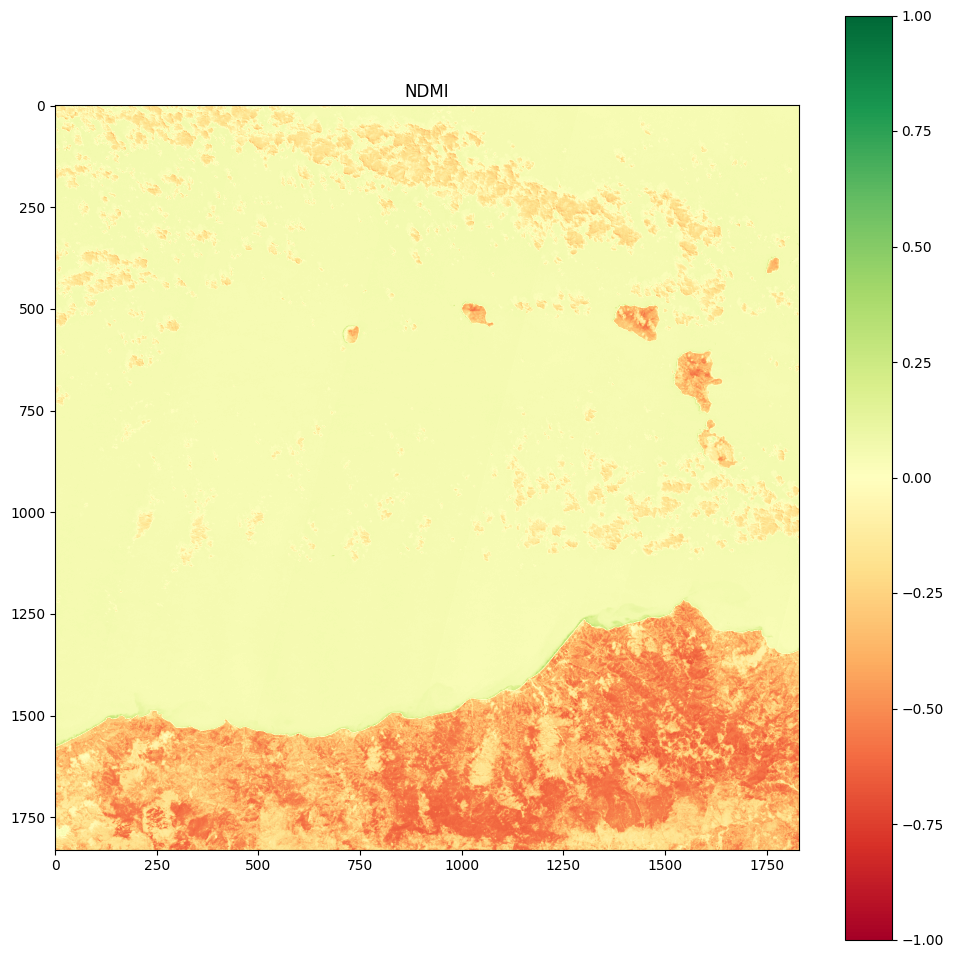

In [20]:
ndmi = (arrImages[3] - arrImages[7])/ (arrImages[3] + arrImages[7])

# Create a Normalize instance to specify the range for the colorbar
norm = mcolors.Normalize(vmin=-1, vmax=1)

# Create a figure and plot the normalized RGB image
plt.figure(figsize=(12, 12))  # Set the figure size as needed
plt.imshow(ndmi, cmap='RdYlGn', norm=norm)

plt.colorbar()
plt.axis('on')  # Show axis
plt.title("NDMI")

More info about indices: https://pro.arcgis.com/en/pro-app/latest/arcpy/image-analyst/vari.htm#:~:text=The%20Visible%20Atmospherically%20Resistant%20Index%20(VARI)%20method%20is%20a%20vegetation,visible%20range%20of%20the%20spectrum.&text=For%20information%20about%20other%20multiband,the%20Band%20Arithmetic%20raster%20function.
